In [2]:
import os
import excursion
import excursion.optimize as optimize
from excursion.testcases.fast import two_functions as scandetails
import numpy as np
import datetime

import excursion.plotting.twodim as plots
import excursion.utils as utils

np.warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
def plot_and_save(workdir, index, *args,**kwargs):
    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(9.5, 3.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,gps,X,y_list,scandetails,**kwargs)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

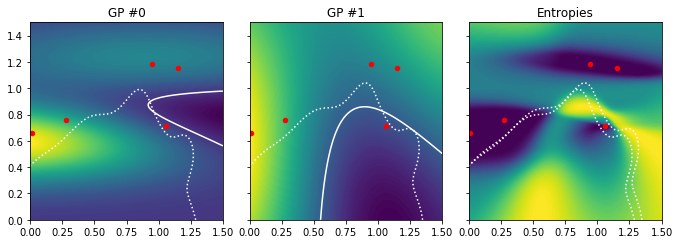

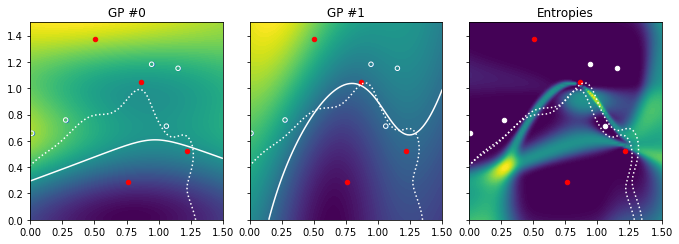

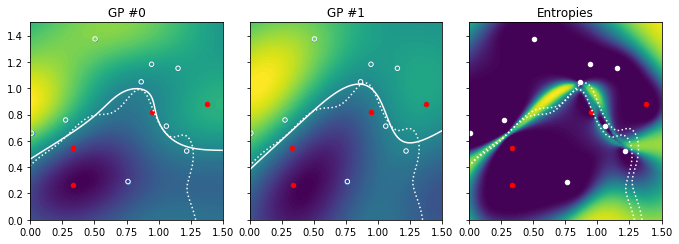

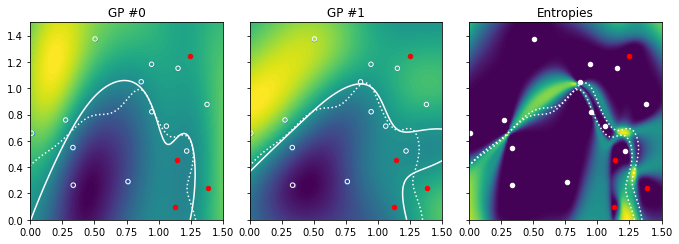

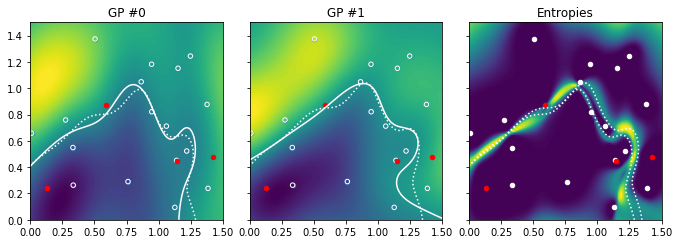

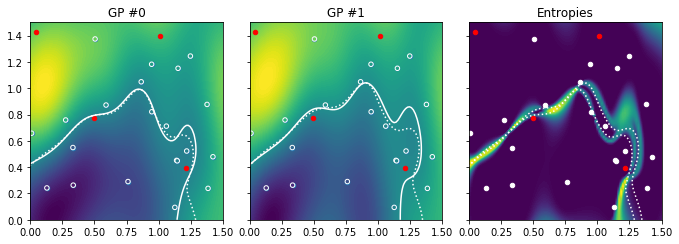

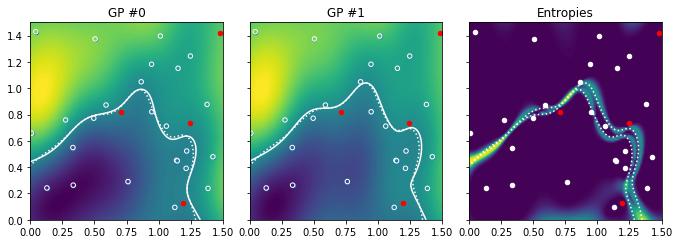

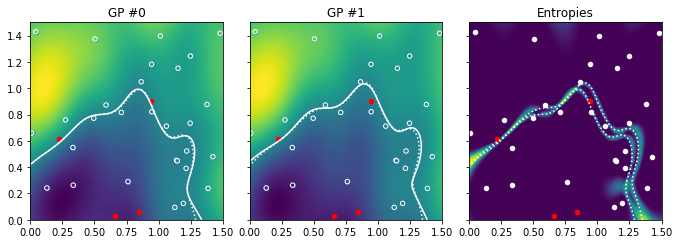

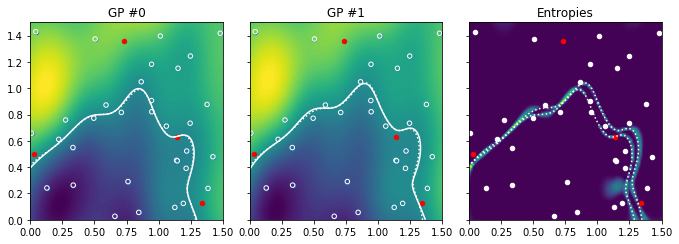

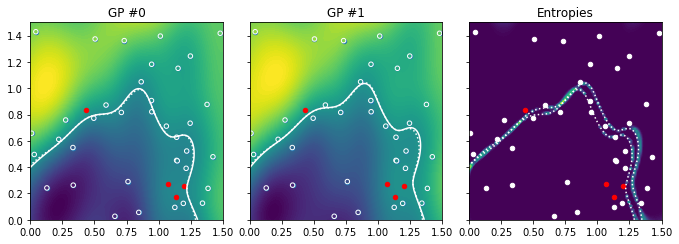

In [14]:
N_UPDATES = 10
N_BATCH = 4
workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
X,y_list,gps = optimize.init(scandetails)
for index in range(N_UPDATES):
    plot_and_save(workdir, index, gps,X,y_list,scandetails, batchsize = (N_BATCH if index > 0 else len(X)), evaluate_truth = True)
    newX = optimize.suggest(gps, X, scandetails, batchsize=N_BATCH)
    X,y_list,gps  = optimize.evaluate_and_refine(X,y_list,newX,scandetails)